In [1]:
import pandas as pd
import numpy as np

In [2]:
rsv = pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
rsv.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
fn = rsv.authors.unique()
thresh = 0
writers = dict()
for f in fn:
    fc = rsv[rsv.authors == f].bookID.count() 
    if fc >= thresh: 
        writers[f] = fc

In [5]:
import matplotlib.pyplot as plt

In [6]:
writers = dict(sorted(writers.items(), key=lambda item: item[1], reverse=True)[:10])

## Simple Counting of writers
Thus obtained graph is shown as follows
showing that P.G. Woodhouse and Stephen King are equally dominating

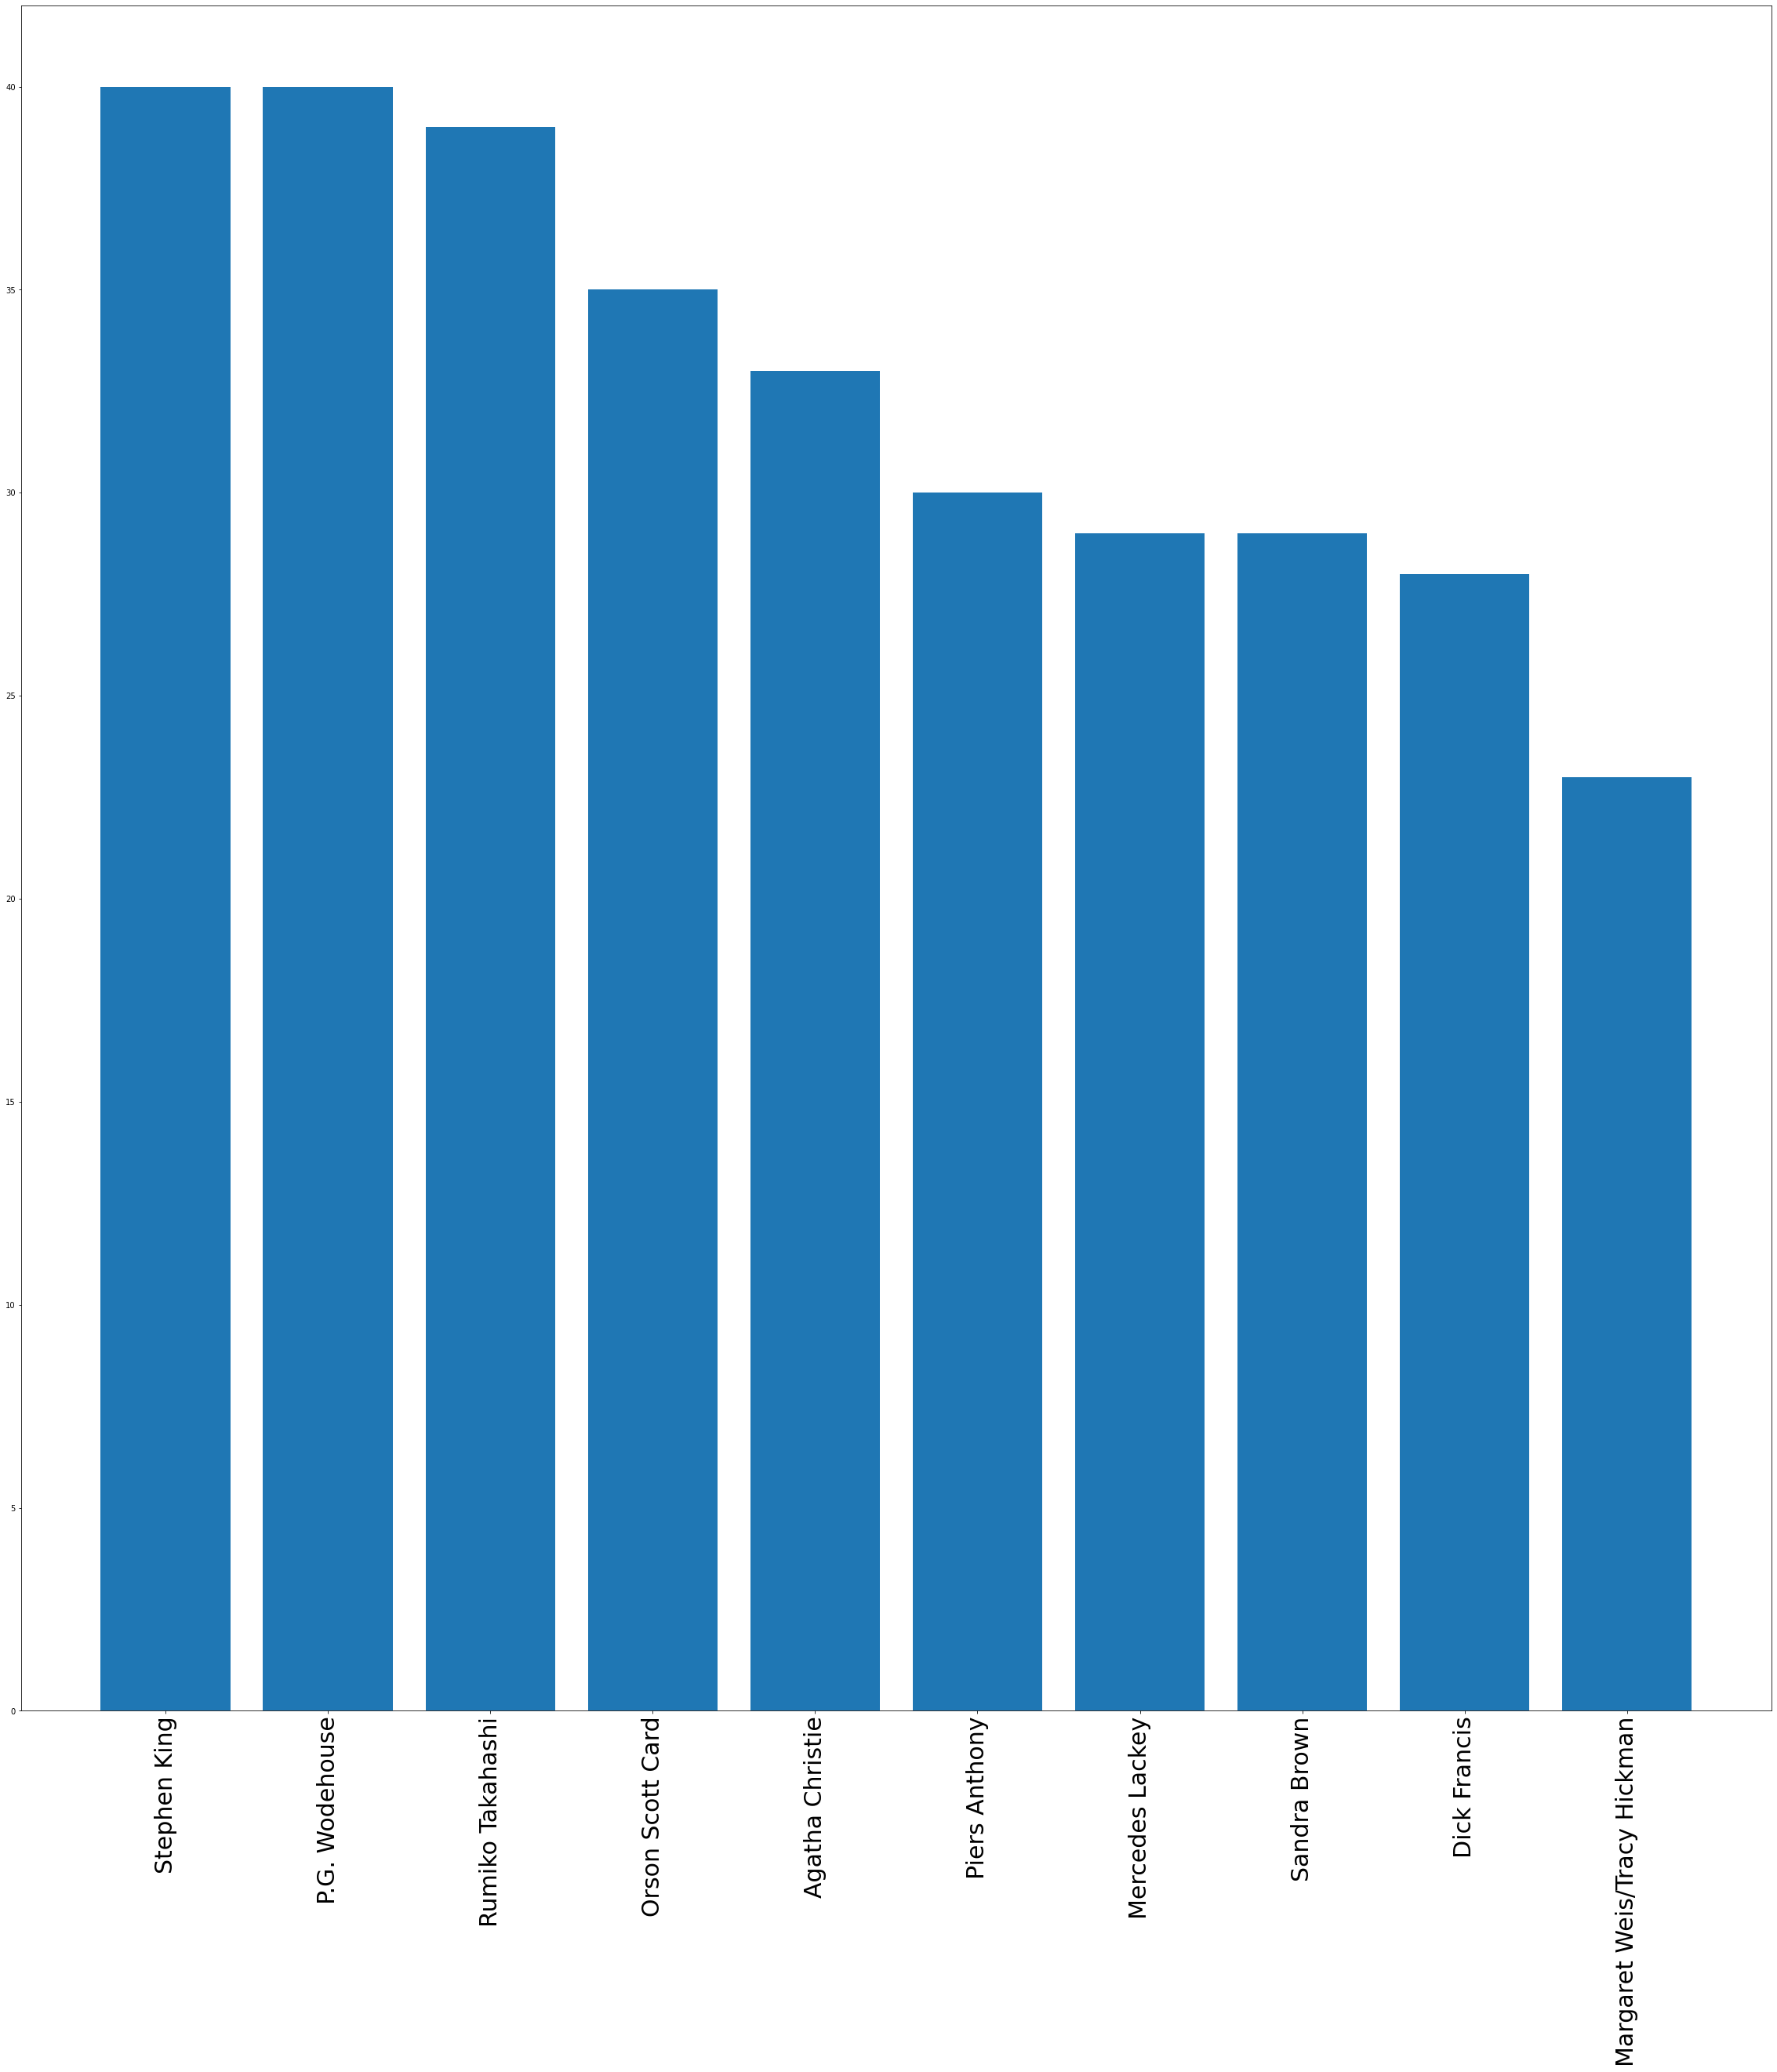

In [7]:
plt.figure(figsize=(40, 40))
plt.bar(range(len(writers)), list(writers.values()), align='center')
plt.xticks(range(len(writers)), list(writers.keys()), fontsize=30, rotation=90)
plt.show();

In [8]:
writers

{'Stephen King': 40,
 'P.G. Wodehouse': 40,
 'Rumiko Takahashi': 39,
 'Orson Scott Card': 35,
 'Agatha Christie': 33,
 'Piers Anthony': 30,
 'Mercedes Lackey': 29,
 'Sandra Brown': 29,
 'Dick Francis': 28,
 'Margaret Weis/Tracy Hickman': 23}

# Question mark 
ON the Authors columns, Clearly multiple authors are seprated by a "/" which is "incorrect" for direct
data analysis. So after figuring out a "function" which does the following:->
* It looks for '/' in the authors
* Seprates them if normally acessed
* But if the book is already seen, maximum number of writers are considered
* Hence we find that actual count was incorrect
* Also includes single writers


In [9]:
title_arr = []
writers_arr = []
single_writer = []
for f in fn:
    if '/' in f:
        try:
            book = rsv[rsv.authors == f].title.values[0]
            if book in title_arr:
                if len(writers_arr[title_arr.index(book)]) < len(f.split('/')):
                    writers_arr[title_arr.index(book)] = f.split('/')
            else:
                title_arr.append(book)
                writers_arr.append(f.split('/'))
        except IndexError:
            title_arr.append(rsv[rsv.authors == f].title.values[0])
            writers_arr.append(f.split('/'))

In [10]:
len(title_arr)

3563

In [11]:
len(title_arr)

3563

In [12]:
len(set(title_arr))

3563

In [13]:
unique_writes = set()
count = 0
max_len = 0
for x,y  in zip(title_arr, writers_arr):
    if len(y) > max_len:
        max_len = len(y)
    for z in y:
        unique_writes.add(z)
        count+=1

In [14]:
for k in writers.keys():
    if '/' not in k:
        unique_writes.add(k)
        count+=1

In [15]:
len(unique_writes)

7123

In [16]:
count

10464

In [17]:
get_books = dict.fromkeys(unique_writes, 0)

In [18]:
for x,y in zip(title_arr, writers_arr):
    for z in y:
        get_books[z]+=1

In [19]:
for x in writers.items():
    if '/' not in x[0]:
        get_books[x[0]]+=x[1]

In [20]:
rsv.sort_values(by=['ratings_count'],ascending=False)[:10]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [21]:
get_books = dict(sorted(get_books.items(), key=lambda item: item[1], reverse=True))

## The correct visualization
The visualization is perfect as everything is taken into account, hence Seeing Stephen King as a dominant

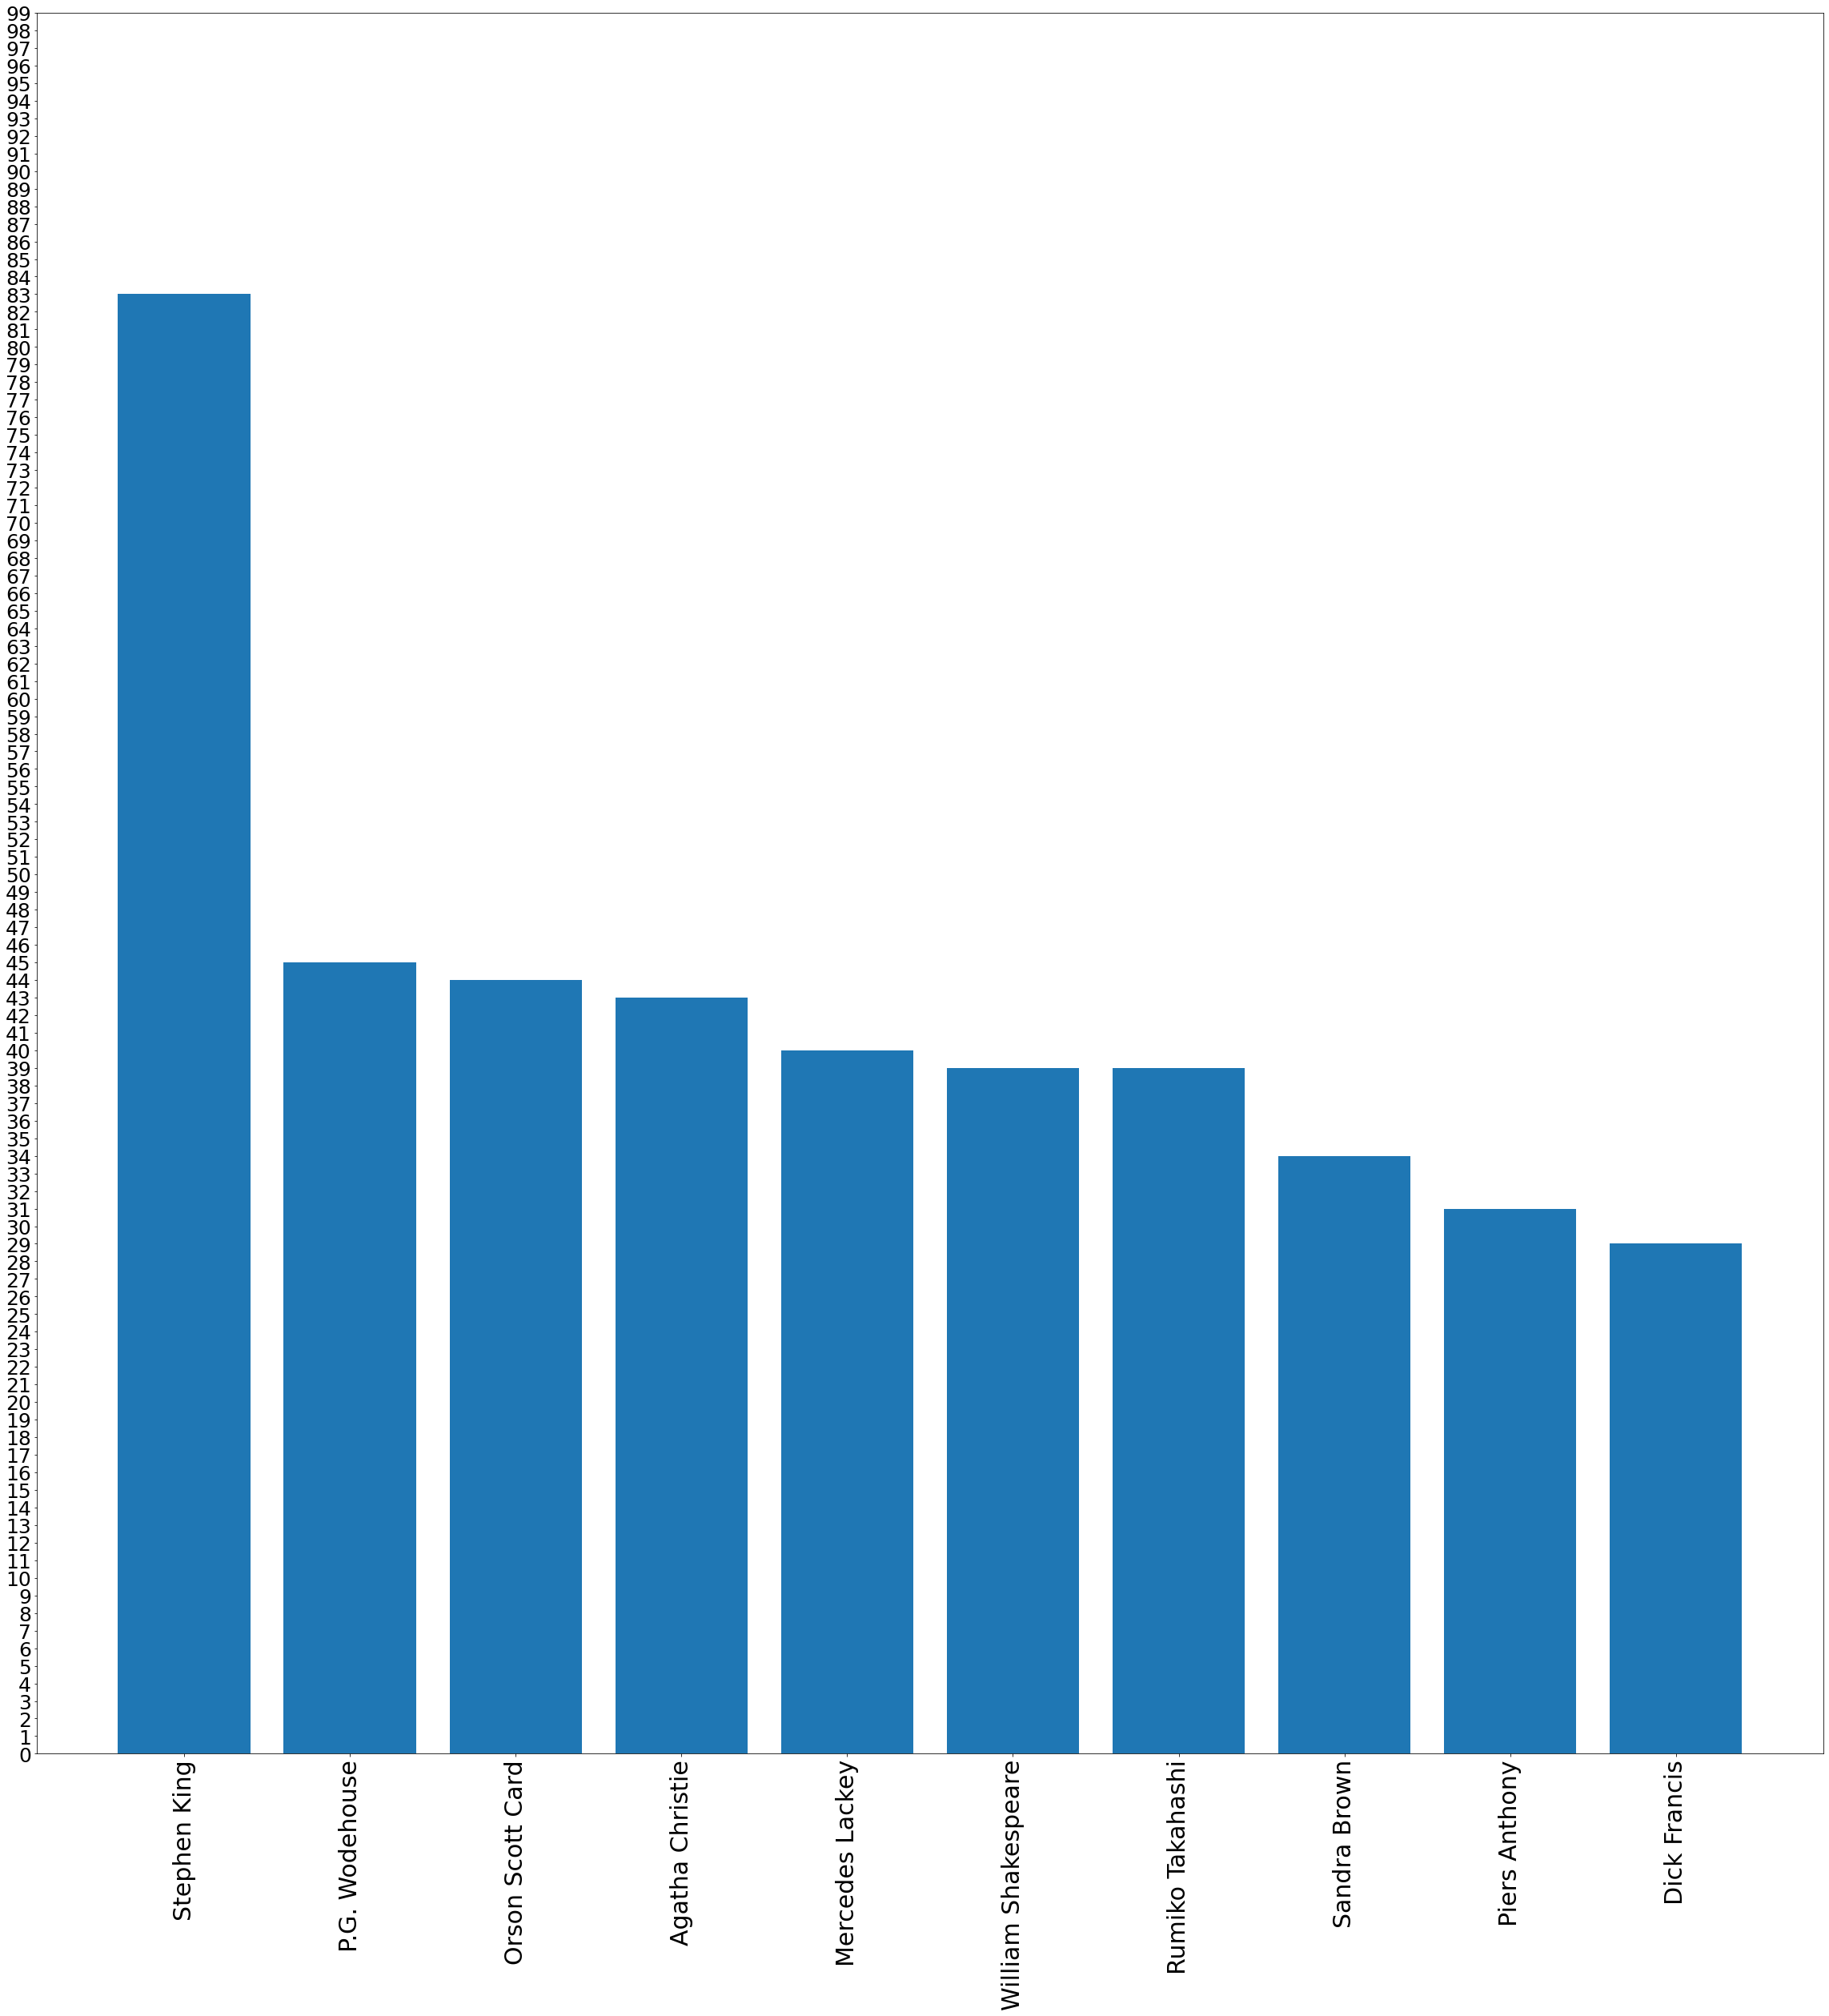

In [22]:
plt.figure(figsize=(40, 40));
plt.bar(range(10), list(get_books.values())[:10], align='center')
plt.xticks(range(10), list(get_books.keys())[:10], fontsize=30, rotation=90)
plt.yticks(range(100), range(100), fontsize=25)
plt.show();

In [23]:
rsv.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [24]:
rsv["Rating_Interval"] = pd.DataFrame(pd.cut(rsv.average_rating, 5, [0.0,1.0,2.0,3.0,4.0,5.0]))

In [25]:
ratings = dict()
for i in range(0,5,1):
    ratings[str(i)+" to "+str(i+1)] = (rsv["Rating_Interval"] == pd.Interval(left = float(i), right = float(i+1))).sum()

In [26]:
del ratings['0 to 1']

In [27]:
ratings

{'1 to 2': 7, '2 to 3': 69, '3 to 4': 6285, '4 to 5': 4735}

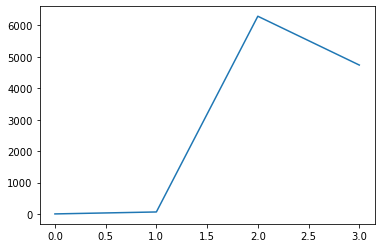

In [28]:
plt.plot([i for i in range(4)], list(ratings.values())[:4])

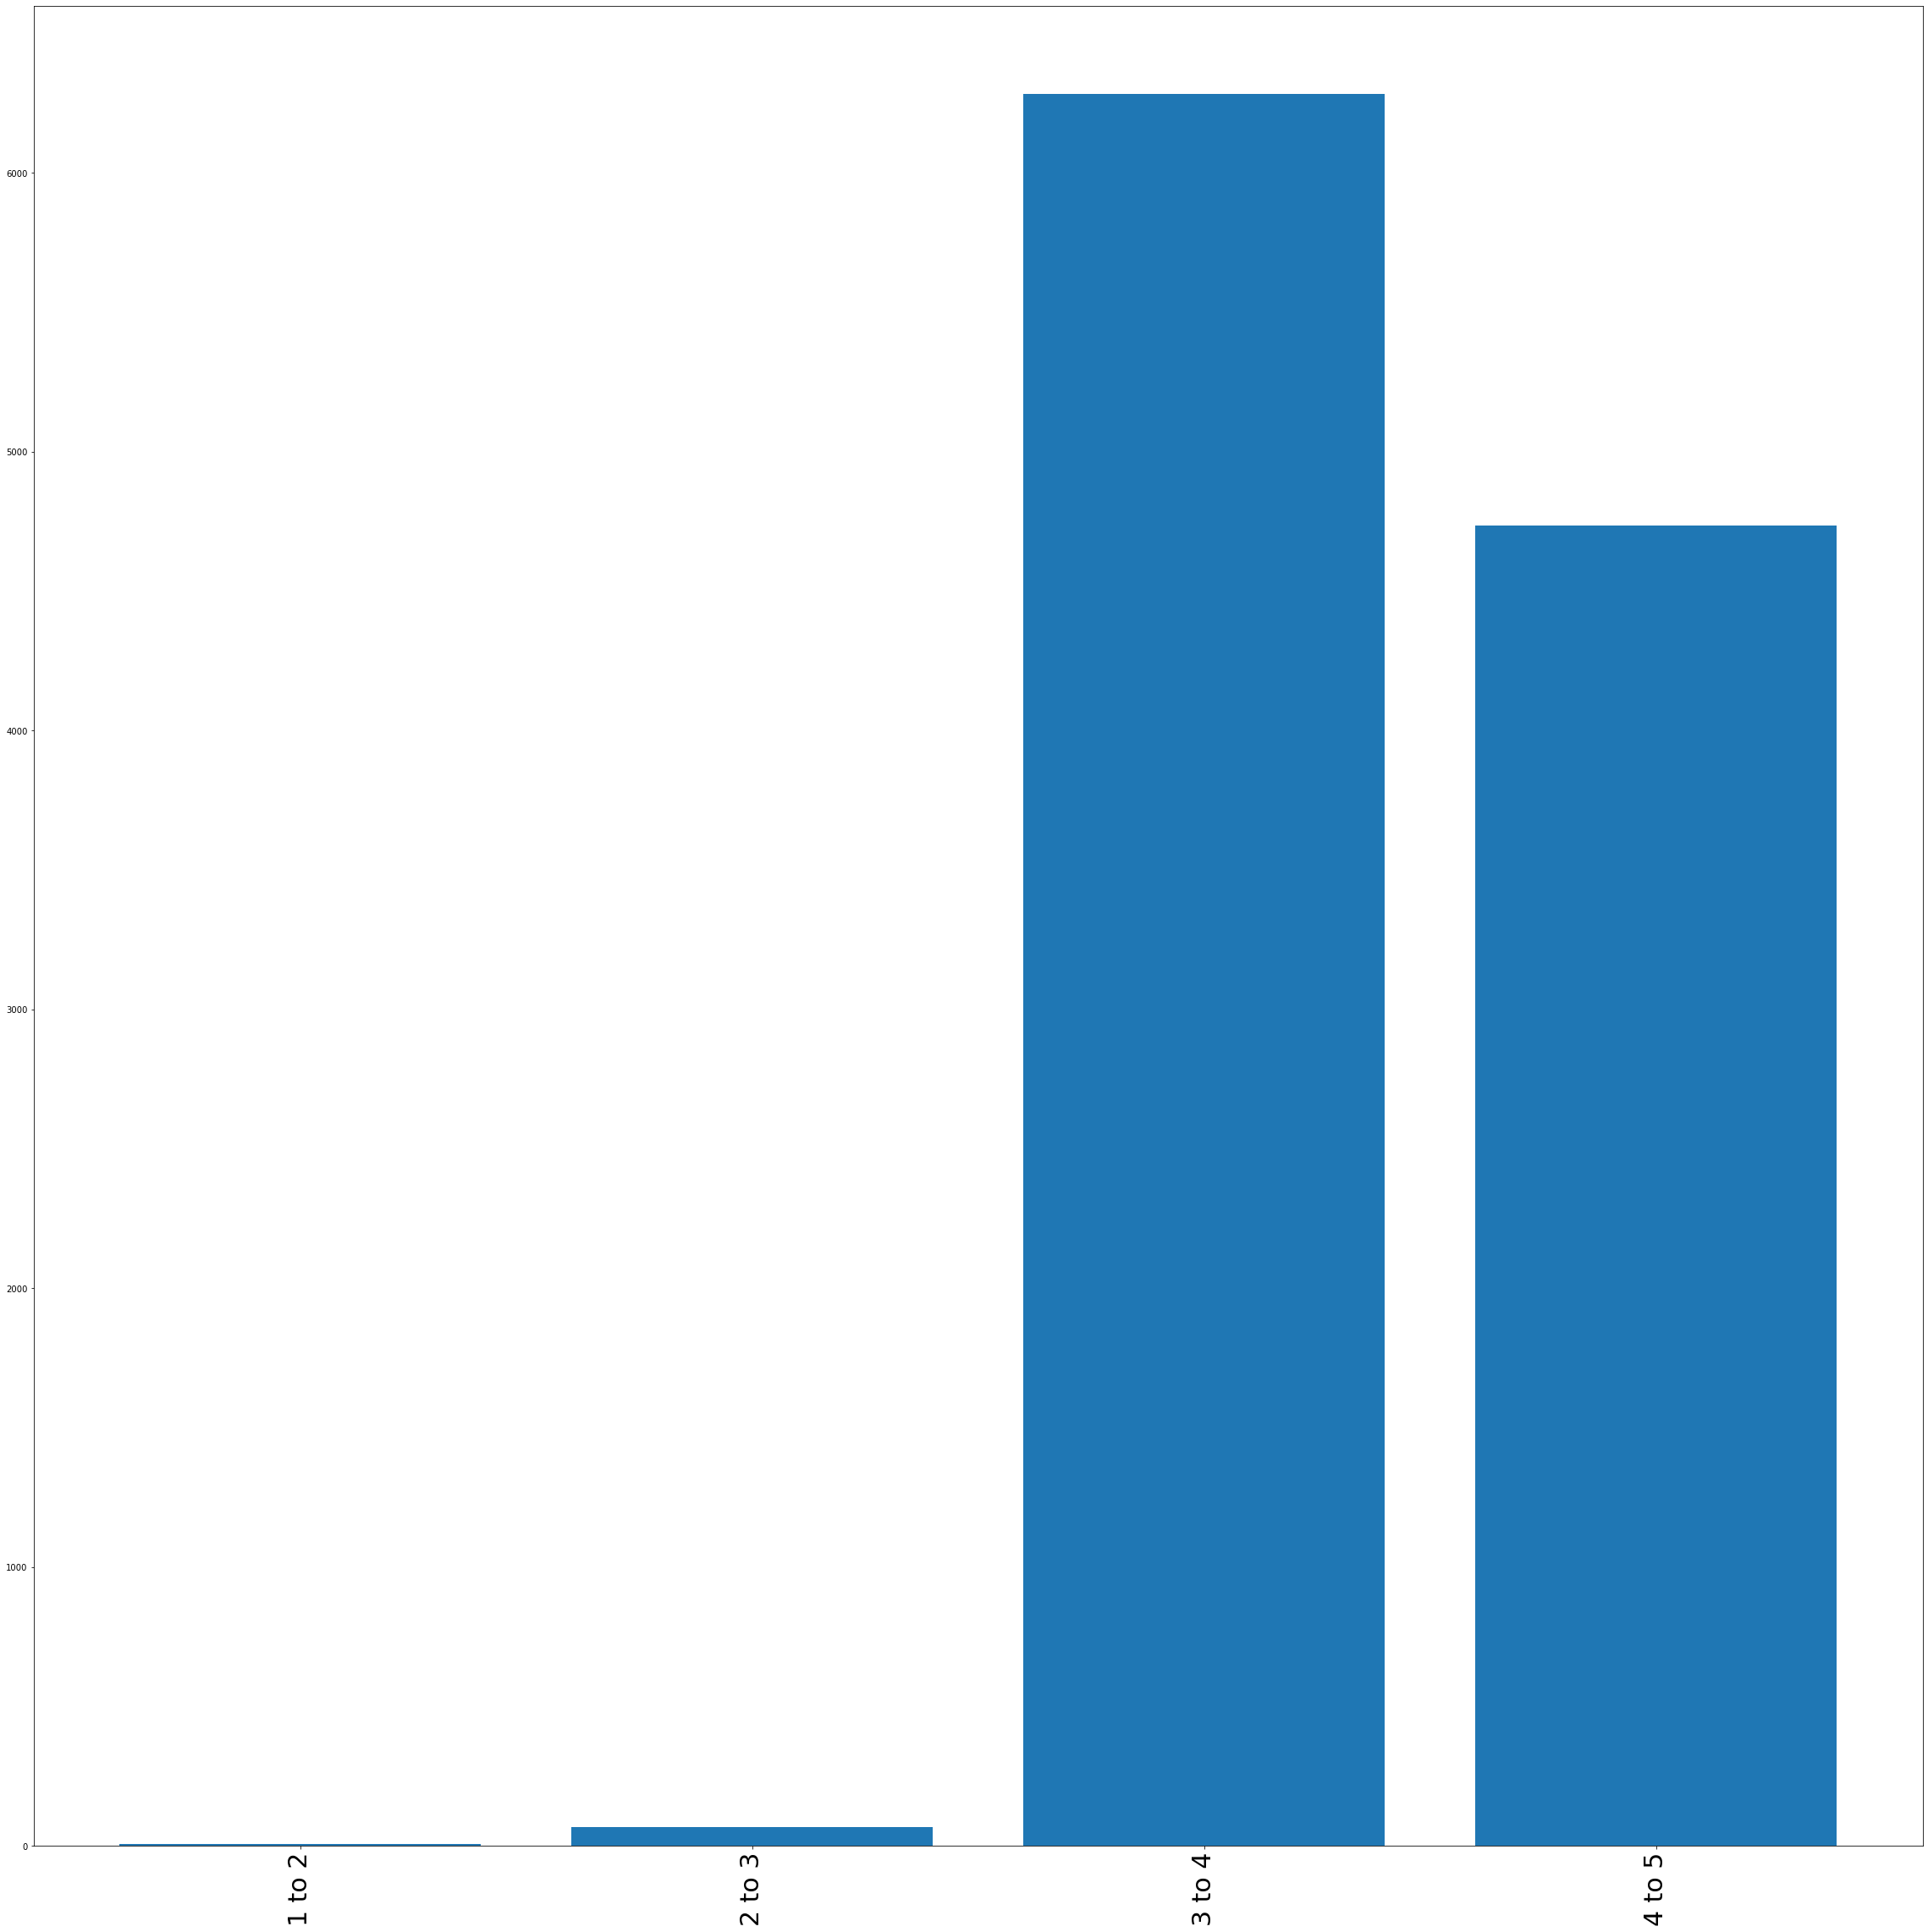

In [29]:
plt.figure(figsize=(40, 40));
plt.bar(range(len(ratings)), list(ratings.values()), align='center')
plt.xticks(range(len(ratings)), list(ratings.keys()), fontsize=30, rotation=90)
# plt.yticks(range(50), range(50), fontsize=30)
plt.show();

## Ratings
From the above graph we can clearly see that the dominating rating is
3 to 4, moreover the average lies between 3 to 4.
This is skewed data, as well an indication that the 
dataset given has more 3 to 5 star books within the sample

In [30]:
lang = dict()

In [31]:
rsv.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [32]:
lang["eng"] = 0

In [33]:
skip = ["eng","en-US","en-CA","en-GB"]

In [34]:
unq_lang = rsv.language_code.unique()

In [35]:
for x in unq_lang:
    if x not in skip:
        lang[x] = rsv[rsv.language_code == x].bookID.count()
    if x in skip:
        lang["eng"]+=rsv[rsv.language_code == x].bookID.count()

In [36]:
lang

{'eng': 10537,
 'fre': 144,
 'spa': 218,
 'mul': 19,
 'grc': 11,
 'enm': 3,
 'ger': 99,
 'jpn': 46,
 'ara': 1,
 'nl': 1,
 'zho': 14,
 'lat': 3,
 'por': 10,
 'srp': 1,
 'ita': 5,
 'rus': 2,
 'msa': 1,
 'glg': 1,
 'wel': 1,
 'swe': 2,
 'nor': 1,
 'tur': 1,
 'gla': 1,
 'ale': 1}

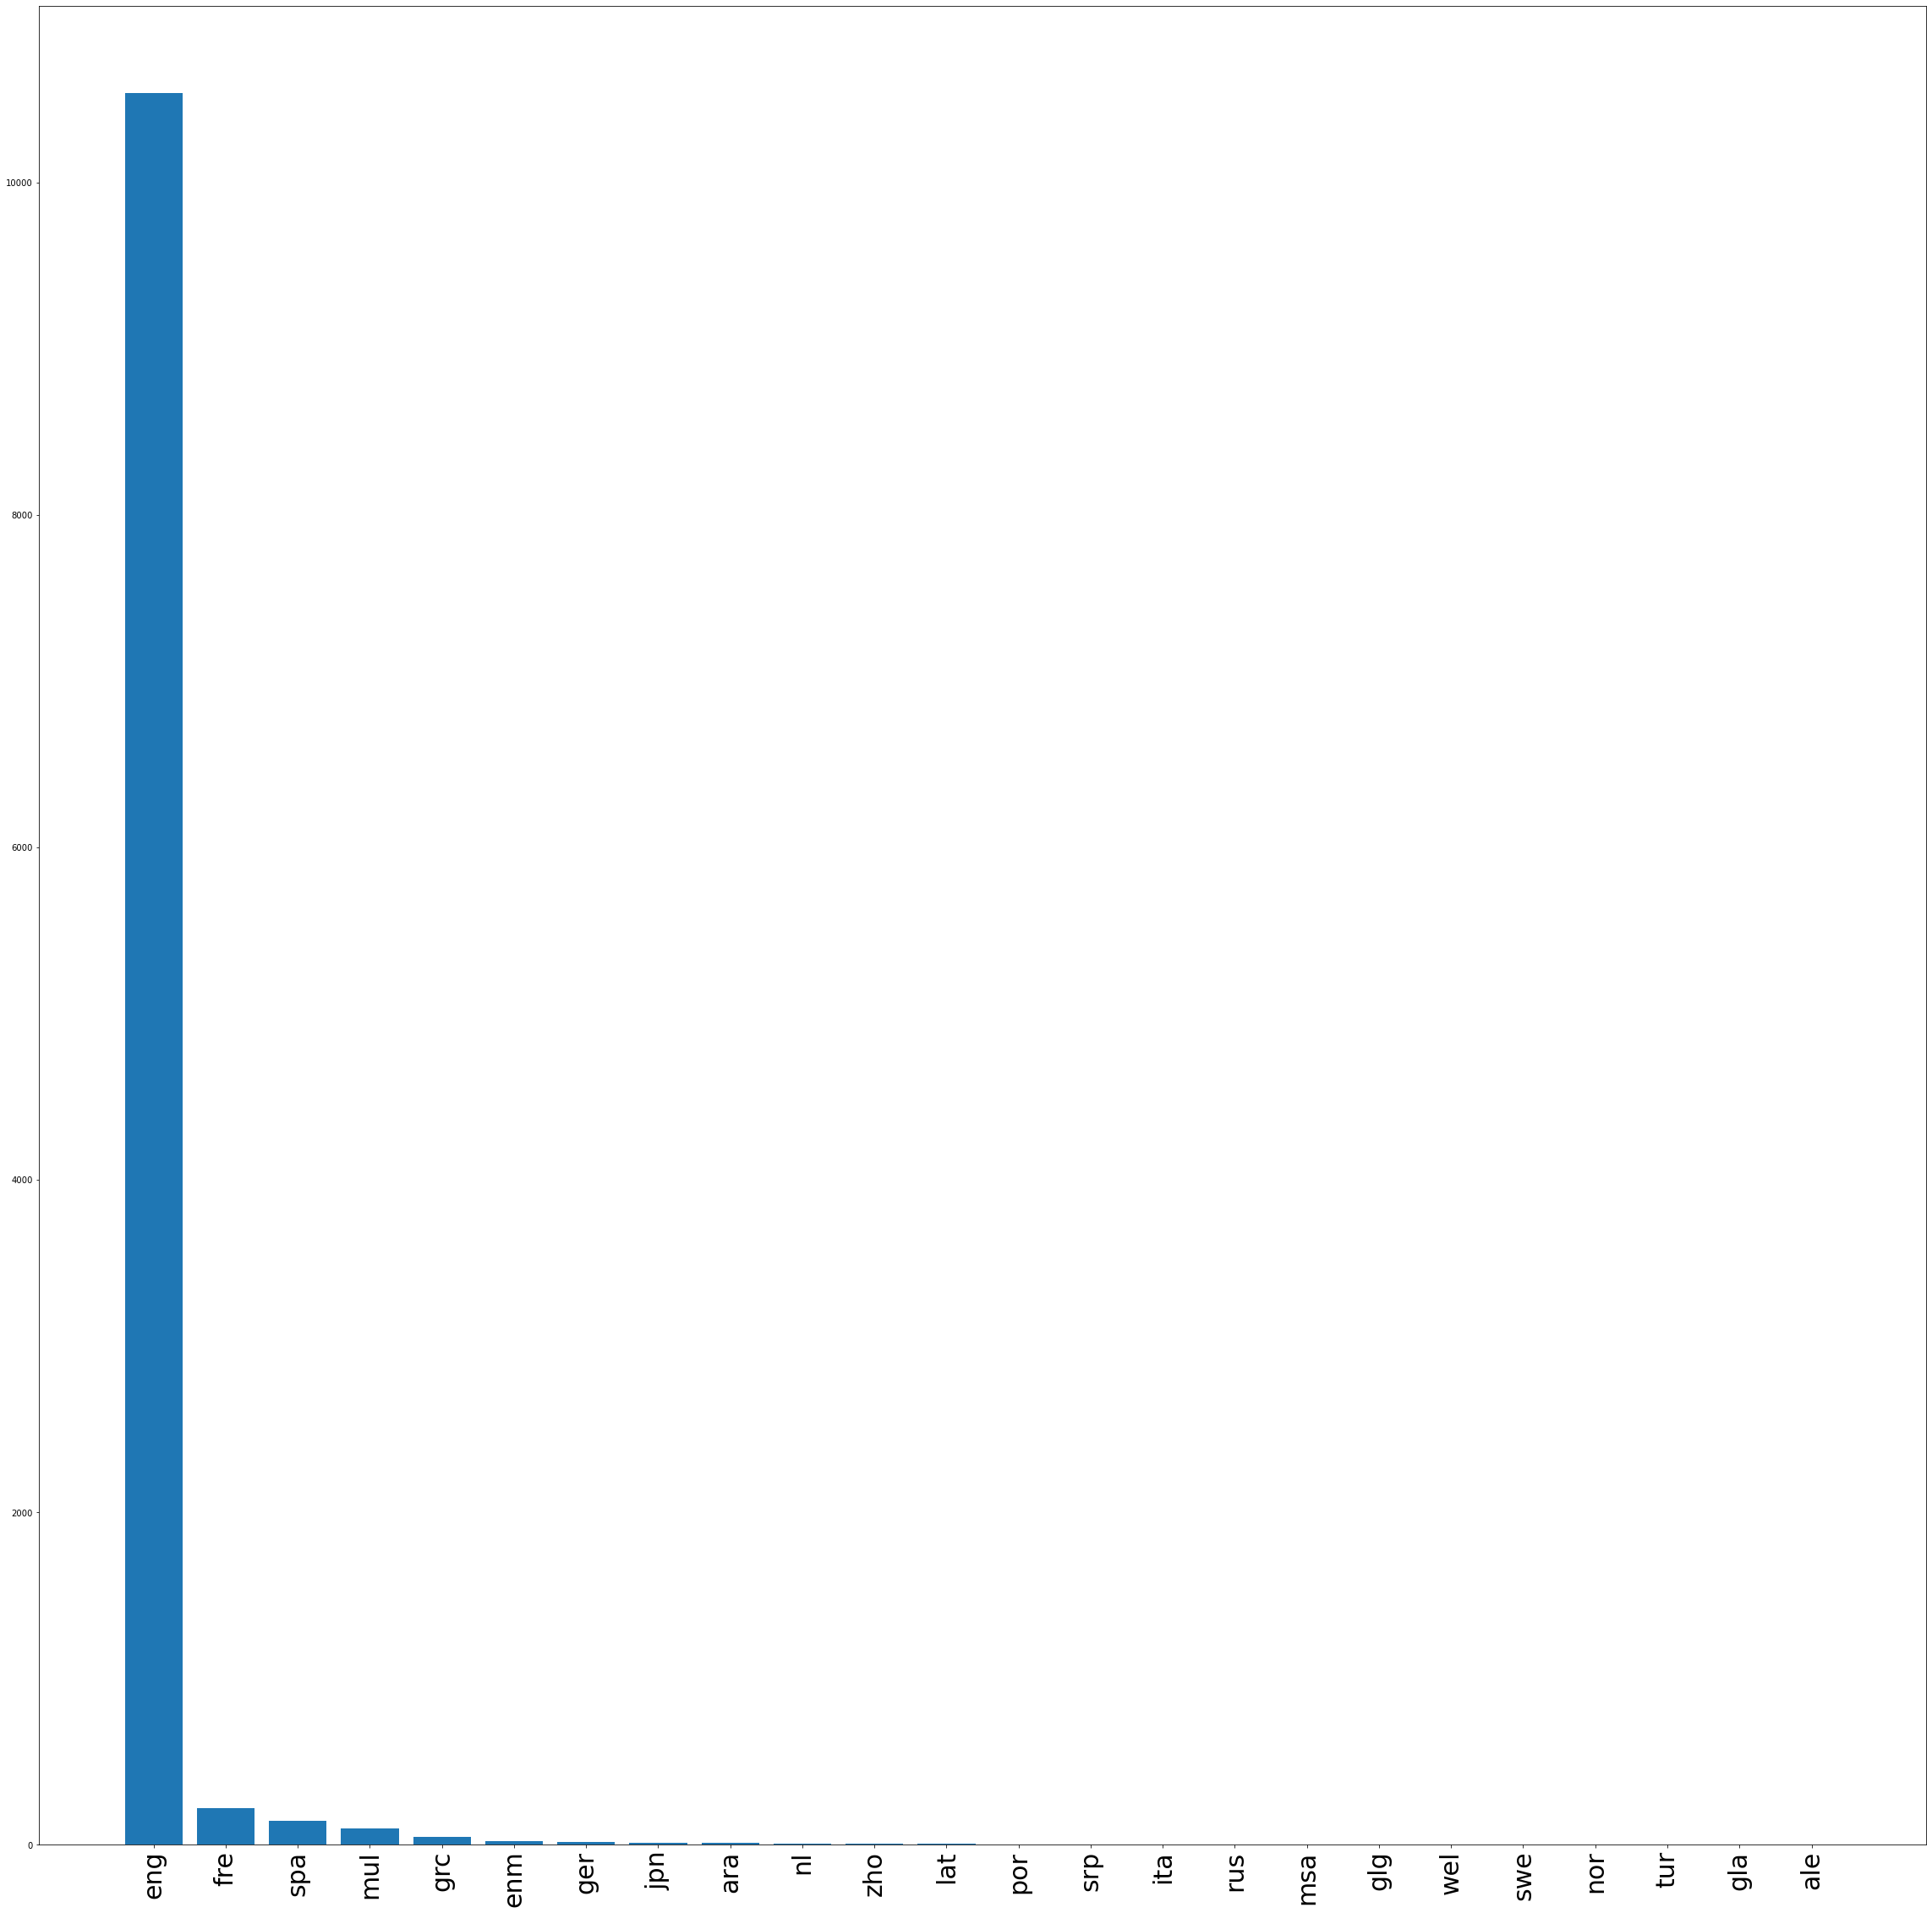

In [37]:
plt.figure(figsize=(40, 40))
plt.bar(range(len(lang)), sorted(list(lang.values()))[::-1], align='center')
plt.xticks(range(len(lang)), list(lang.keys()), fontsize=30, rotation=90)
plt.show();

## Observing Above graph
English is most dominating language,
but in the next bar graph Down below if
English is removed we see graph looks normal
and not totally dominant by a single language

In [38]:
del lang["eng"]

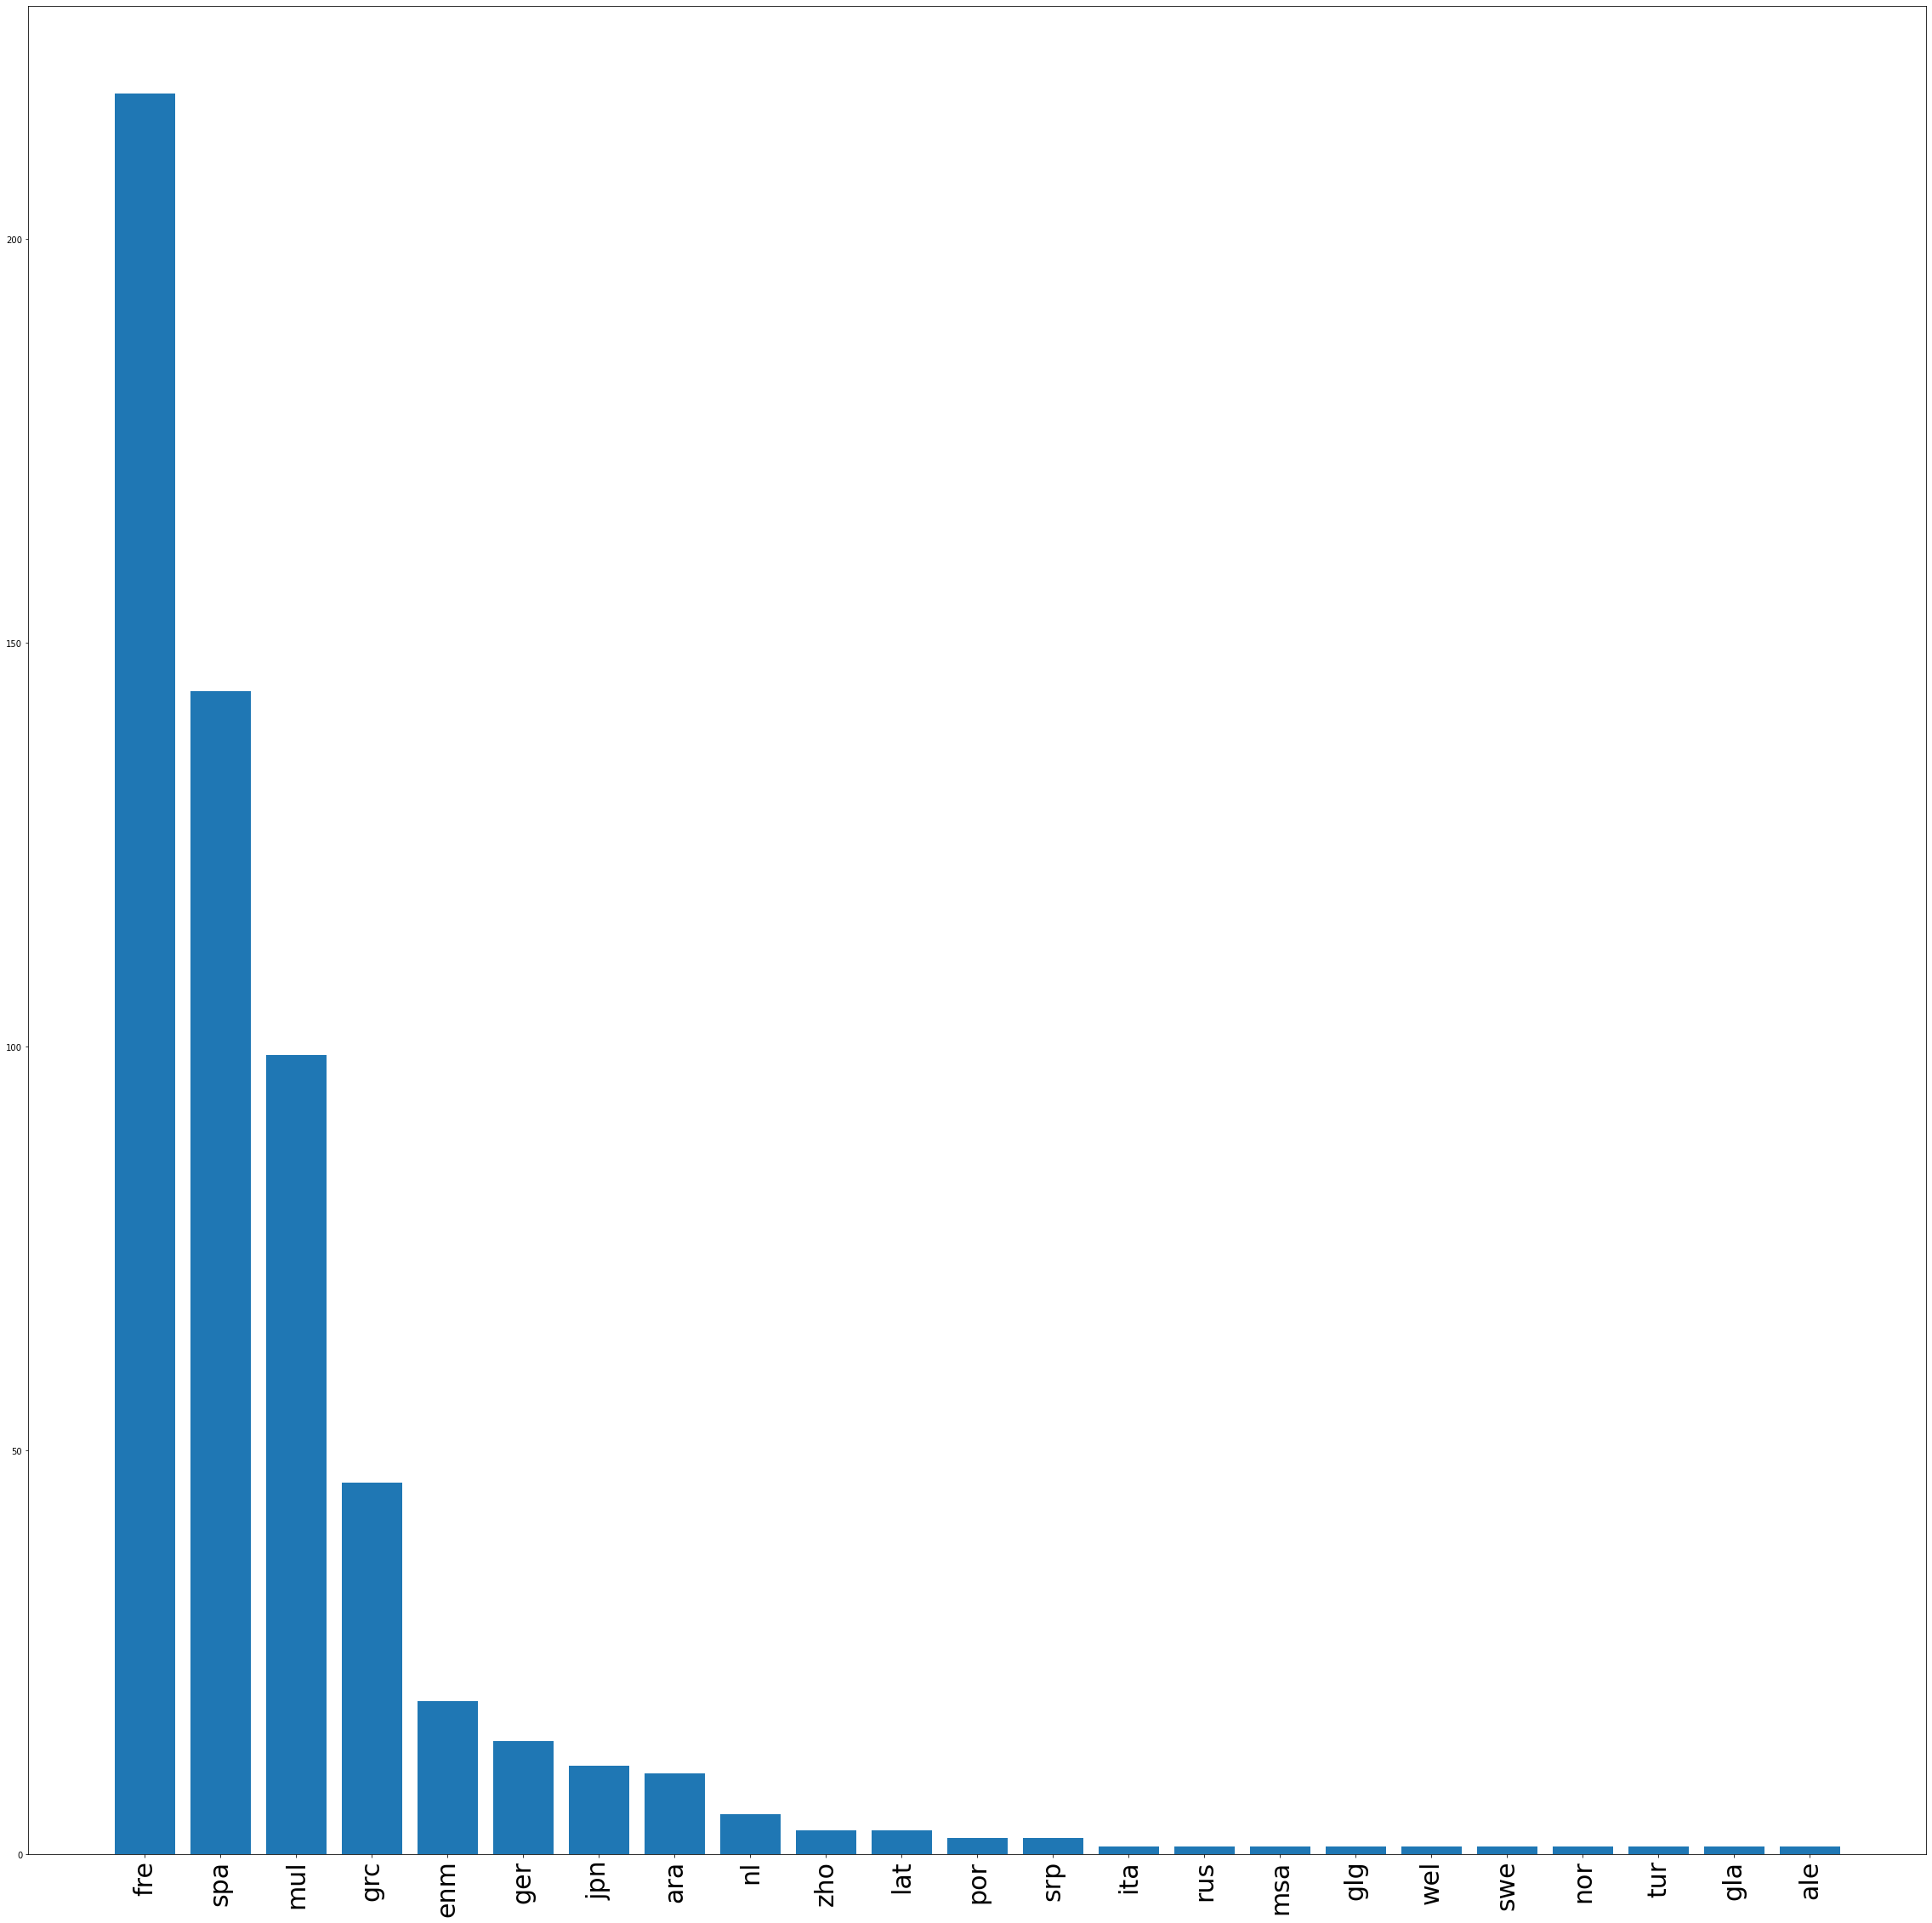

In [39]:
plt.figure(figsize=(40, 40))
plt.bar(range(len(lang)), sorted(list(lang.values()))[::-1], align='center')
plt.xticks(range(len(lang)), list(lang.keys()), fontsize=30, rotation=90)
plt.show();